# Panda Basics

This incredible workbook is authored by [Melanie Walsh](https://melaniewalsh.org/) (with minor modifications) and is available as part of her open-source book [Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html).

This file is an example of a Jupyter Notebook. A Jupyter notebook is a document that can combine live programming code, text (formatted using something called Markdown), images, and pretty displays of data all in the same place. This combination makes Jupyter notebooks clutch for exploring data as well as for learning and teaching.

A Jupyter notebook has a special .ipynb file extension and can only be opened if you have the application JupyterLab or Jupyter Notebook installed and running, or on a cloud server like Binder.

*Note: You can explore this [notebook](https://mybinder.org/v2/gh/j-nila/SN1-notebook-1/HEAD?labpath=Pandas-Basics.ipynb) in the cloud.*

In this lesson, we're going to introduce some of the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files. A CSV file is like an Excel file, basically with column headings and rows of data.

We will cover how to:

* Import Pandas
* Read in a CSV file
* Explore and filter data
* Make simple plots and data visualizations


___

## Dataset
### The Bellevue Almshouse Dataset

<blockquote class="epigraph" style=" padding: 10px">

Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

-Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)
</blockquote>


The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

We want to think about how responsible data analysis requires more than just technical tools like Pandas. It also requires an interrogation of the data. Who collected this data? How and why was this data collected? What assumptions are present in this data? What are the consequences of this data in the world? What does this data reflect about the world? For example, Shrout claims that the "Bellevue administrators framed any ailments or difficulties inmates might have had as a consequence of [their immigration] status" — perhaps best exemplified by the fact that a frequent "disease" in the dataset is "recent emigrant." Below we're going to explore the prevalence of "recent emigrant" in the data as well as other salient patterns.

___

## Import Pandas

To use the Pandas library, we first need to `import` it. There is a Python code cell below: make sure your run it!

In [22]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

## Read in CSV File

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our file. 

In [23]:
bellevue_df = pd.read_csv('bellevue_almshouse_modified.csv')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *bellevue_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame. When a code cell ends with a variable name, it is the same as printing the contents of that variable.

In [24]:
bellevue_df

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo
...,...,...,...,...,...,...,...,...
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN


There are a few important things to note about the DataFrame displayed here:

* Index
    * The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. 

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because Pandas by default will display rows and columns to fit in the screen. Anything more will be truncated.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (9584 x 8 columns).
    * This is very useful!

### Display First *n* Rows

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`. Often we just want to look at a few rows to understand the data that is contained in the file.

In [25]:
bellevue_df.head(2)

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo


## Question 1

Play around with the code! What happens if you try to invoke `head` with no parameters?

<details>
  <summary>Answer</summary>
  There is a default value that is used, which is 5. You will notice that many Pandas methods have more parameters that you can tweak, but often the default values are good enough for beginners.
</details>


### Display Random Sample

To look at a random sample of rows, we can use the `.sample()` method.

In [26]:
bellevue_df.sample(10)

,date_in,first_name,last_name,age,disease,profession,gender,children
2666,1846-03-03,Ann,Clifford,28.0,NaN,married,w,NaN
1315,1847-05-25,Thomas,Mahon,37.0,recent emigrant,laborer,m,NaN
3068,1847-01-21,Mary,Kearney,16.0,pregnant,spinster,w,NaN
3372,1846-05-16,Thomas,Bartly,33.0,NaN,laborer,m,NaN
5535,1847-04-28,Mary,Johnson,35.0,sickness,widow,w,NaN
9528,1847-09-02,Robert,Thompson,35.0,ulcers,weaver,m,NaN
7850,1847-07-01,Mary,Cowdry,30.0,sickness,spinster,w,NaN
9161,1846-03-03,John,Hope,22.0,NaN,laborer,m,NaN
2958,1847-01-05,Ann,Vaughn,30.0,sickness,married,w,NaN
2926,1846-04-28,Owen,McCabe,30.0,NaN,laborer,m,NaN


## Get Info

To get important info about all the **columns** in the DataFrame, we can use `.info()`.

In [27]:
bellevue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_in     9584 non-null   object 
 1   first_name  9580 non-null   object 
 2   last_name   9584 non-null   object 
 3   age         9534 non-null   float64
 4   disease     6497 non-null   object 
 5   profession  8565 non-null   object 
 6   gender      9584 non-null   object 
 7   children    37 non-null     object 
dtypes: float64(1), object(7)
memory usage: 599.1+ KB


This report will tell us how many non-null, or non-blank, values are in each column, as well as what *type* of data is in each column.



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

## Question 2

What do you think non-null count means?

<details>
  <summary>Answer</summary>
  This tell you how many values are actually in the rows. For example, even though thre are 9584 rows, there are only 9534 ages found. This means that 50 rows have no age information. You can think of null as indicating that the data is not available, or that the value is undefined for that row.
</details>

## Calculate Summary Statistics

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

In [28]:
bellevue_df.describe().round(2)

,age
count,9534.00
mean,30.33
std,14.18
min,0.08
25%,21.00
50%,28.00
75%,39.00
max,97.00


## Question 3

There are too many decimal digits that are being computed for the description of `age`. We want to round it to 2 decimals only. Look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html) and see if you can make the change in the code cell above.

<details>
  <summary>Answer</summary>
  <code>bellevue_df.describe().round(2)</code> will round the content on each column.
</details>

By default, `.describe()` will only compute columns with numerical data. To include all columns, we can use `include='all'`.

In [29]:
bellevue_df.describe(include='all')

,date_in,first_name,last_name,age,disease,profession,gender,children
count,9584,9580,9584,9534.000000,6497,8565,9584,37
unique,653,523,3142,NaN,75,172,5,36
top,1847-05-24,Mary,Kelly,NaN,sickness,laborer,m,Child
freq,113,979,137,NaN,2706,3108,4958,2
mean,NaN,NaN,NaN,30.332604,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,14.179608,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN


Here are some insights that can be gleaned from these summary statistics:
- We cannot compute numerical statistics for columns that are not numeric. `NaN` indicates "not a number"
- For the column **date_in**, the earliest recorded admission to the Bellevue Almshouse (**first**) is 1846-01-01  and the latest (**last**) is 1847-12-31 
- For the column **first_name**, the most frequently occurring first name (**top**) is Mary, which appears 979 times (**freq**)
- For the column **last_name**, the most frequently occurring last name (**top**) is Kelly, which appears 137 times (**freq**)
- For the column **age**, average age in the dataset (**mean**) is 30, the youngest (**min**) is .8, and the oldest (**max**) is 97
- For the columns **disease** and **profession**, there are 75 unique (**unique**) diseases and 172 unique (**unique**) professions
- For the column **children**, there are 37 rows that include information about children (**count**) (i.e., rows that do not have blank values)



## Select Columns

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [30]:
bellevue_df['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9579                NaN
9580               lame
9581                NaN
9582                NaN
9583        destitution
Name: disease, Length: 9584, dtype: object

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [31]:
type(bellevue_df['disease'])

pandas.core.series.Series

A Series object displays differently than a DataFrame object. To select a column as a DataFrame and not as a Series object, we will use two square brackets.

In [32]:
bellevue_df[['disease']]

,disease
0,recent emigrant
1,recent emigrant
2,recent emigrant
3,recent emigrant
4,recent emigrant
...,...
9579,NaN
9580,lame
9581,NaN
9582,NaN


In [33]:
type(bellevue_df[['disease']])

pandas.core.frame.DataFrame

By using two square brackets, we can also select multiple columns at the same time. This is like makeing a smaller DataFrame from a big one by only selecting the columns that we need. This is useful when a dataset contains a lot of data that we don't need.

In [34]:
bellevue_df[['first_name', 'last_name', 'disease']]

,first_name,last_name,disease
0,Mary,Gallagher,recent emigrant
1,John,Sanin (?),recent emigrant
2,Anthony,Clark,recent emigrant
3,Lawrence,Feeney,recent emigrant
4,Henry,Joyce,recent emigrant
...,...,...,...
9579,Mary,Smith,NaN
9580,Francis,Riley,lame
9581,Martin,Dunn,NaN
9582,Elizabeth,Post,NaN


``` {warning}
Heads up! The code below will cause an error. This will cause all the cell clock below to not run until you specify that they should.
```

See what happens if we try to select multiple columns as a Series...

In [35]:
bellevue_df['first_name', 'last_name', 'disease']

KeyError: ('first_name', 'last_name', 'disease')

## Count Values

To count the number of *unique* values in a column, we can use the `.value_counts()` method.

```{sidebar} On Bellevue Almshouse "Diseases"
> Some were diagnosed with medically recognizable illnesses, including “fever,” “dropsy” and “neuralgia.” Others were diagnosed with “diseases” that made visible the ways in which immigrants were failing to meet the expectations of urban citizenship. These included “destitution” and “recent emigrant.” Neither of these diagnoses reflected an immigrant’s health. Nevertheless, they were treated as pathologies, and those pathologies governed city officials perceptions of immigrants. Sickness, injuries or destitution were subsumed under the pathology of “recent emigrant.” This diagnosis also determined immigrants’ paths through the New York City public health system.

-Anelise Shrout, ["(Re)Humanizing Data: Digitally Navigating the Bellevue Almshouse"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)
```

In [36]:
bellevue_df['disease'].value_counts()

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
                   ... 
horrors               1
from trial            1
ungovernable          1
smallpox              1
asthma                1
Name: count, Length: 75, dtype: int64

Look through the so-called "diseases" recorded in the Bellevue Almshouse data and consider what these categories reflect about New York City in the 1840s, particularly with regard to immigration status.

To select the top 10 most frequent values in the "disease" column, we can combine `value_counts()` with regular Python list slicing.

In [37]:
bellevue_df['disease'].value_counts()[:10]

disease
sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
Name: count, dtype: int64

In [38]:
bellevue_df['profession'].value_counts()[:10]

profession
laborer       3108
married       1584
spinster      1521
widow         1053
shoemaker      158
tailor         116
blacksmith     104
mason           98
weaver          66
carpenter       65
Name: count, dtype: int64

In a similar vein, consider what these "professions" reflect about New York City in the 1840s.

## Question 4

What were the top 5 last names? What about first names? Write your code in the code cell below.

In [43]:
# your answers to Question 

<details>
  <summary>Answer</summary>
  <code>bellevue_df['last_name'].value_counts()[:5]</code> and <code>bellevue_df['first_name'].value_counts()[:5]</code>.
</details>

## Make Charts

Pandas makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

<Axes: title={'center': 'Bellevue Almshouse:\nMost Frequent "Diseases"'}, xlabel='disease'>

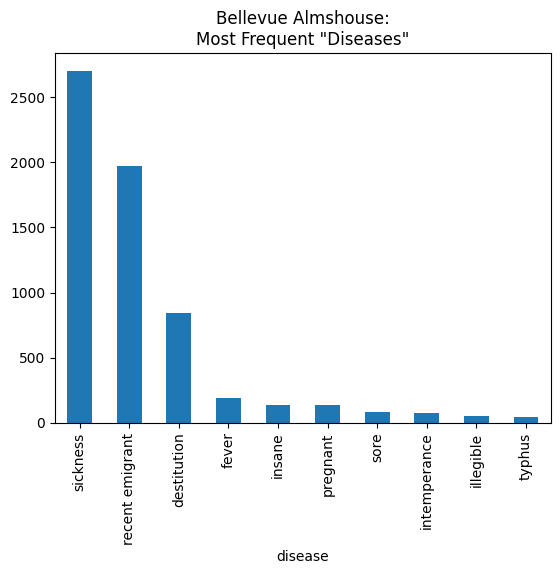

In [47]:
bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots
 
For example, to make a horizontal bar chart, we can set `kind='barh'`

In [ ]:
bellevue_df['disease'].value_counts()[:10].plot(kind='barh',title='Bellevue Almshouse:\nMost Frequent "Diseases"').get_figure().savefig('Bellevue')

To make a pie chart, we can set `kind='pie'`

In [ ]:
bellevue_df['profession'].value_counts()[:10].plot(kind='pie', figsize=(10, 10), title='Bellevue Almshouse:\nMost Frequent "Professions"')

Finally, let's make a histogram plot of the age of the people in the dataset.

In [ ]:
bellevue_df.plot.hist(y='age')

## Choosing the appropriate chart

![Graphing recommendations](./graphing_recs.png)

Source: [Scientific computing 2017](https://github.com/nerdcommander/scientific_computing_2017)

## Filter/Subset Data

We can filter a Pandas DataFrame to select only certain values. Filtering data by certain values is similar to selecting columns.

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. For example, to select only rows that contain the value "teacher," we insert the condition `bellevue_df['profession'] == 'teacher'`. Notice that this condition is compairing a Series (or column) to a string. This is part of the magic of Pandas: it will take care of iterating through the Series and selecting only the rows where the condition is True.

In [ ]:
bellevue_df[bellevue_df['profession'] == 'teacher']

It can be helpful to isolate this condition and see that it produces a long list of True/False pairs for every row.

In [ ]:
bellevue_df['profession'] == 'teacher'

Filtering DataFrames can sometimes get confusing and unwieldy (as conditions within conditions pile up like Russian dolls). It can be helpful to make a separate variable for a filter, as below.

In [ ]:
teacher_filter = bellevue_df['profession'] == 'teacher'

In [ ]:
bellevue_df[teacher_filter]

In a similar vein, it's often useful to make a new variable for a filtered DataFrame. For example, let's say we wanted to look at only the women in the dataset and see the most commons professions.

In [ ]:
women_filter = bellevue_df['gender'] == 'w'

In [ ]:
bellevue_women = bellevue_df[women_filter]

In [ ]:
bellevue_women['profession'].value_counts()

In [ ]:
bellevue_women['profession'].value_counts().plot(kind='pie', figsize=(10,10), title='Bellevue Almshouse:\nMost Frequent "Professions" Among Women')

There's a lot we can do with filters beyond exact value matches with an equals operator `==`.

We can also incorporate `>`, `<`, `>=`, `<=` with integers, floats, and even dates. For example, we can filter the DataFrame for only people who arrived to the Bellevue Almshouse on or after '1847-04-17'

In [ ]:
date_filter = bellevue_df['date_in'] >= '1847-04-17'

In [ ]:
bellevue_df[date_filter]

## Exercise - Climate change

This exercise was inspired by [Callysto](https://callysto.ca/learning-modules/).

We have data from the NASA [Global Climate Change - Vital Signs of the Planet](https://climate.nasa.gov) website. In addition to information about climate change, this website also features those that are working to help make the world better.  

### Sea Ice

Sea ice is frozen sea water that exists around the poles of the Earth because of extremely cold temperatures. Sea ice is frozen for most of the year.

Read the csv file `icesheets.csv`, then answer the following questions:

In [ ]:
# your code here to read the file

1. How many rows and columns are there in the file?

In [ ]:
# your code to get info about the file here

2. draw a line graph about the ice sheets that has the Antarctic mass (Gigatonnes) on the y-axis, against time on the x-axis. Remember to use the name of the column to indicate the data for each axis.

In [ ]:
#your plotting code here

We can see that over time there is a decreasing trend in the mass of ice sheets in the Antarctic. This shows that ice is melting in Antarctica.

## Further Resources

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), Pandas Official Documentation
- ["Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), *Python Data Science*, Jake VanderPlas